In [1]:
import torchvision
torchvision.disable_beta_transforms_warning()
from torchvision.tv_tensors import BoundingBoxes, Mask
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.v2  as transforms
from functools import partial
import numpy as np
import sys 
import os
sys.path.append("/home/tyfei/cyroem")
import utils
import pycocotools
import torch
import matplotlib.pyplot as plt
import pandas as pd
from transformers import DetrForObjectDetection, DetrImageProcessor, DetrForSegmentation
import modules

/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pickle
with open("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/pretrain_npy_annotations.pkl", "rb") as f:
    # pickle.dump(ann, f)
    ann = pickle.load(f)

In [3]:
len(ann["images"])

7800

In [5]:
import random
# q=[] 
# ids = []
# for i in range(len(ann["images"])):
#     if i % 8 ==5:
#         q.append(ann["images"][i])
#         ids.append(ann["images"][i]["id"])
# w = [] 
# for i in range(len(ann["annotations"])):
#     if (ann["annotations"][i]["image_id"] in ids):
#         w.append(ann["annotations"][i]) 
ids = [] 
q = ann["images"]
w = ann["annotations"]
for i in range(len(ann["images"])):
    ids.append(ann["images"][i]["id"])
random.seed(0)
t1 = random.sample(ids, len(ids)//5) 
q1 = [] 
q2 = [] 
w1 = [] 
w2 = []
for qq in q:
    if qq["id"] in t1:
        q2.append(qq)
    else:
        q1.append(qq)
for ww in w:
    if ww["image_id"] in t1:
        w2.append(ww)
    else:
        w1.append(ww)
ann["images"] = q1 
ann["annotations"] = w1
with open("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/pretrain_npy_annotations_train.pkl", "wb") as f:
    pickle.dump(ann, f)
ann["images"] = q2 
ann["annotations"] = w2
with open("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/pretrain_npy_annotations_val.pkl", "wb") as f:
    pickle.dump(ann, f)

In [7]:

dataset = modules.CocoDetection("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset", 
                        "/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/annotations/pretrain_npy_annotations_4.pkl",
                        is_npy=True, transform=utils.getDefaultTransform(), require_mask=True, add_classname=True)
train_set, val_set = torch.utils.data.random_split(dataset, [0.8, 0.2])

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


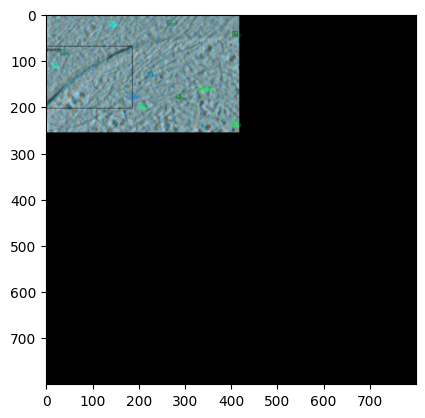

In [11]:
data = dataset[50]
utils.drawannotation(data["pixel_values"], data["labels"])
# print(image)
# cimage, target = allt(torch.tensor(image), target)

In [1]:
100*8000/4

200000.0

In [4]:
import json
import os
import modules
import utils
path = "/mnt/panbz/lab/transforemer_model/pretrain_data/train_results/test_less"

with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)
    
dataset1 = modules.CocoDetection(
        configs["data"]["image_path"],
        configs["data"]["annotation_path"],
        is_npy=configs["data"]["is_npy"],
        transform=utils.getDefaultTransform(),
        require_mask=configs["data"]["require_mask"],
        filter_class=configs["data"]["filter_class"],
        single_class=configs["data"]["single_class"],
    )
len(dataset1)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


0

In [45]:
from PIL import Image 
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=mean, std=std)
])
img = Image.open("./demo.jpg")
img_transformed = transform(img)

In [46]:
img_transformed.shape

torch.Size([3, 427, 640])

In [47]:
img_transformed[0].mean()

tensor(0.3354)

In [25]:
rt = transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1], inplace=True)
rt(data["pixel_values"])

tensor([[[0.7487, 0.7348, 0.7282,  ..., 0.0000, 0.0000, 0.0000],
         [0.7279, 0.7240, 0.7146,  ..., 0.0000, 0.0000, 0.0000],
         [0.7228, 0.7213, 0.7114,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.7940, 0.7892, 0.7413,  ..., 0.0000, 0.0000, 0.0000],
         [0.7699, 0.7593, 0.7226,  ..., 0.0000, 0.0000, 0.0000],
         [0.7643, 0.7582, 0.7094,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.7481, 0.7700, 0.7647,  ..., 0.0000, 0.0000, 0.0000],
         [0.7443, 0.7644, 0.7681,  ..., 0.0000, 0.0000, 0.0000],
         [0.7275, 0.7401, 0.7645,  ..., 0.0000, 0.0000, 0.

In [5]:
data["labels"]["boxes"]

BoundingBoxes([[ 43, 426, 316, 620],
               [ 20, 650, 187, 800],
               [173, 718, 189, 736],
               [179, 691, 200, 711],
               [223, 732, 239, 754],
               [110, 621, 128, 639],
               [389, 604, 402, 618],
               [193, 772, 209, 788],
               [176, 630, 189, 643],
               [102, 600, 123, 616],
               [ 71, 575,  90, 599],
               [360, 671, 380, 693],
               [304, 638, 323, 659],
               [ 36, 594,  57, 616],
               [ 59, 703,  76, 722],
               [289, 661, 309, 682],
               [407, 558, 420, 569],
               [  9, 728,  32, 751],
               [219, 723, 220, 725],
               [199, 694, 214, 709],
               [131, 600, 145, 605],
               [ 73, 685,  97, 705],
               [214, 660, 264, 693],
               [253, 419, 287, 477],
               [ 12, 726,  27, 773],
               [ 50, 701,  75, 728],
               [ 32, 679,  54, 716],
 

In [11]:
mask

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [292]:
image.shape

torch.Size([3, 359, 430])

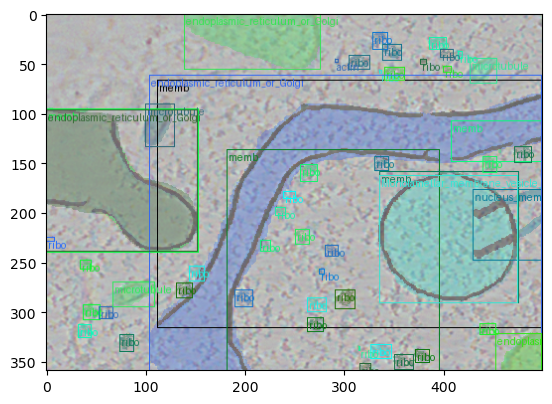

In [295]:
newrr = transforms.Resize((359, 500))
image, target = newrr(image, target)
drawannotation(image, target)

/home/tyfei/.local/lib/python3.12/site-packages/torchvision/utils.py:224: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


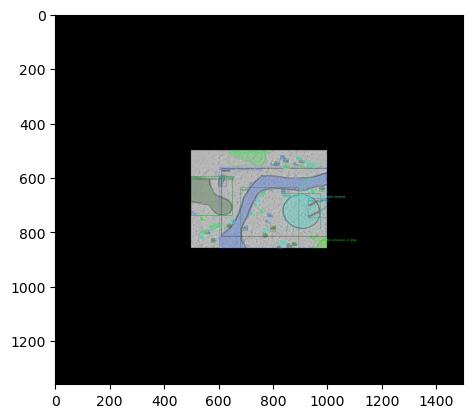

In [296]:
newrr = transforms.Pad((500, 500))
newimage, newtarget = newrr(image, target)
drawannotation(newimage, newtarget)

In [192]:
cococdataset[20][1]["labels"]

tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
         4,  4,  4,  7,  5, 11, 11,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6, 12, 12, 12, 12, 12, 12, 12])

/tmp/ipykernel_1204575/930626644.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image*255).type(torch.uint8)


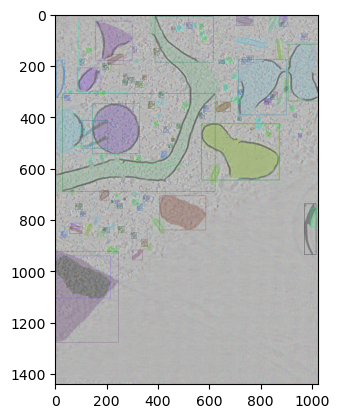

In [155]:
image, target = cococdataset[20]
drawannotation(image, target)


In [217]:
allt = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True), 
    transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),
    # transforms.Lambda(lambda x:torch.clamp(x, min=-4.0, max=4.0)), 
    transforms.RandomIoUCrop(), 
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomVerticalFlip(p=0.5), 
    transforms.SanitizeBoundingBoxes(),
])

In [227]:
# allt = transforms.RandomIoUCrop()
# iou_crop = transforms.RandomCrop((600, 600))
# print(image.shape)
image, target = cococdataset[20]
# print(image)
cimage, target = allt(torch.tensor(image), target)
# print(cimage.shape)
# drawannotation(image.numpy(), target)

In [134]:
target["masks"].shape 
target["boxes"].shape

torch.Size([135, 4])

In [135]:
target["labels"]

tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
         4,  4,  4,  7,  5, 11, 11,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6, 12, 12, 12, 12, 12, 12, 12])

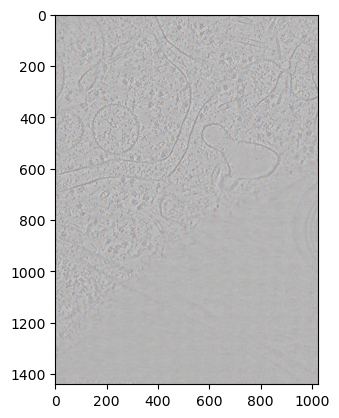

In [92]:
plt.imshow(np.moveaxis(image, 0, -1))